In [1]:
from analysis.get_dataframe_from_results import get_pandas_dataset
from analysis.dataset_graphs import plot_graphs_of_dataset_loc
from analysis.get_tables_results import create_table_cleaned
from analysis.get_results import bar_chart_fix_position_cleaned
from analysis.get_results import sucess_vs_position_cleaned,get_latex_table_with_verif_stats
from analysis.get_results import compute_stats_tests

import utils.global_variables as gl
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [2]:
RESULT_DIR = gl.BASE_PATH / "results/dafny_llm_results_best_overall"
DATASET_DIR = gl.DAFNY_ASSERTION_DATASET
print(DATASET_DIR)
print(RESULT_DIR)
verif_data_pd = get_pandas_dataset(DATASET_DIR, RESULT_DIR)
verif_data_pd  = verif_data_pd.assign(success=lambda d: d['verif_sucess'] > 0) 

/home/ricostynha/Desktop/dafny_assertion_inference/dataset/dafny_assertion_dataset
/home/ricostynha/Desktop/dafny_assertion_inference/results/dafny_llm_results_best_overall



\begin{table}[!t]
\begin{center}
\small
\caption{Verification success rate of each approach across benchmark categories, using the best retrieval strategy MulEmb$0.25_{in}$.}
\label{tbl:assertion-inference-verification}
\begin{tabular}{|l|c|c|c|c|}
\hline
\multirow{2}{*}{Approach} & \multicolumn{4}{c|}{Benchmarks} \\
\cline{2-5}
 & w/o-1 (236) & w/o-2 (184) & All (28) & Combined (448) \\
\hline
Laurel$_{fl}$ & 124 (52.0\%) & \phantom{0}12 (\phantom{0}6.0\%) & \phantom{00}3 (10.0\%) & 139 (31.0\%) \\
LLM$_{fl}$ & 116 (49.0\%) & \phantom{0}18 (\phantom{0}9.0\%) & \phantom{00}6 (21.0\%) & 140 (31.2\%) \\
Laurel$_{fl+}$ & 136 (57.0\%) & \phantom{00}6 (\phantom{0}3.0\%) & \phantom{00}3 (10.0\%) & 145 (32.4\%) \\
LLMEX$_{fl}$ & 126 (53.0\%) & \phantom{0}18 (\phantom{0}9.0\%) & \phantom{00}5 (17.0\%) & 149 (33.3\%) \\
Hybrid$_{fl}$ & 159 (67.0\%) & \phantom{0}26 (14.0\%) & \phantom{00}6 (21.0\%) & 191 (42.6\%) \\
GrTru$_{fl}$ & 136 (57.0\%) & \phantom{0}35 (19.0\%) & \phantom{00}7 (25.0\%) &

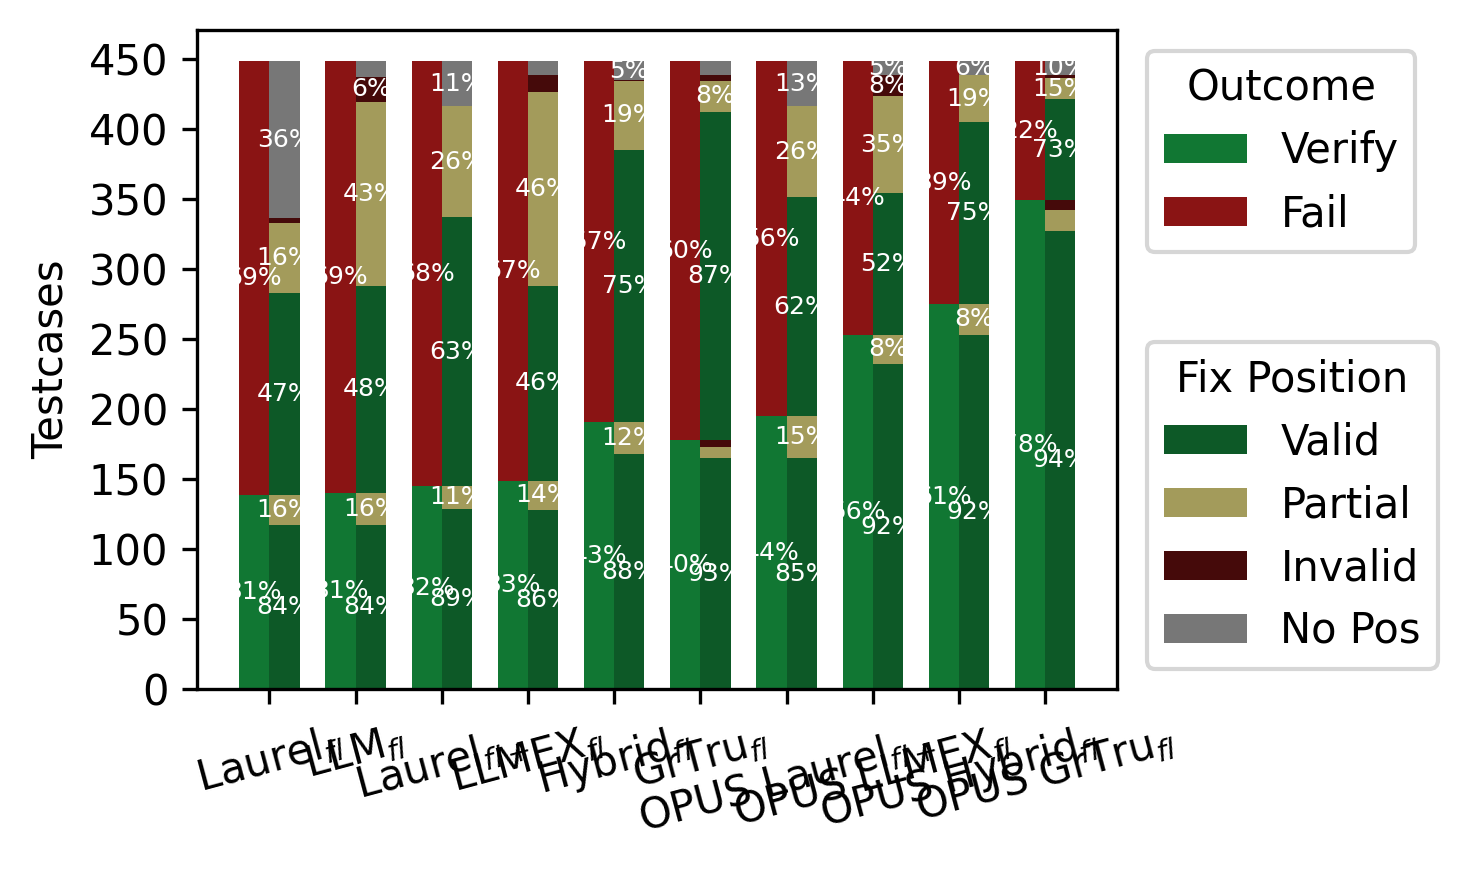

In [ ]:
# Graphs of position evaluation
test_models ={ 
"claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_alpha_0.25_ExType_ExampleStrategies.DYNAMIC_loc_LocStrategies.LAUREL" : "Laurel$_{fl}$",
"claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_alpha_0.25_ExType_ExampleStrategies.DYNAMIC_loc_LocStrategies.LLM" : "LLM$_{fl}$",
"claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_alpha_0.25_ExType_ExampleStrategies.DYNAMIC_loc_LocStrategies.LAUREL_BETTER" : "Laurel$_{fl+}$",
"claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_alpha_0.25_ExType_ExampleStrategies.DYNAMIC_loc_LocStrategies.LLM_EXAMPLE" : "LLMEX$_{fl}$",
"claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_alpha_0.25_ExType_ExampleStrategies.DYNAMIC_loc_LocStrategies.HYBRID" : "Hybrid$_{fl}$",
"claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_alpha_0.25_ExType_ExampleStrategies.DYNAMIC_loc_LocStrategies.ORACLE" : "GrTru$_{fl}$",

"claude-opus-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_alpha_0.25_ExType_ExampleStrategies.DYNAMIC_loc_LocStrategies.LAUREL_BETTER" : "OPUS Laurel$_{fl+}$",
"claude-opus-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_alpha_0.25_ExType_ExampleStrategies.DYNAMIC_loc_LocStrategies.LLM_EXAMPLE" : "OPUS LLMEX$_{fl}$",
"claude-opus-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_alpha_0.25_ExType_ExampleStrategies.DYNAMIC_loc_LocStrategies.HYBRID" : "OPUS Hybrid$_{fl}$",
"claude-opus-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_alpha_0.25_ExType_ExampleStrategies.DYNAMIC_loc_LocStrategies.ORACLE" : "OPUS GrTru$_{fl}$"
}

#verif_data_pd = verif_data_pd[verif_data_pd["benchmark"] == "w/o-1"]
#verif_data_pd = verif_data_pd[verif_data_pd["benchmark"] != "w/o-1"]

dual_name = "rq1__best_overall.pdf"
images_p = gl.BASE_PATH / "images"
info = get_latex_table_with_verif_stats(verif_data_pd, "Verification success rate of each approach across benchmark categories, using the best retrieval strategy MulEmb$0.25_{in}$.", "tbl:assertion-inference-verification", test_models)
print(info)
sucess_vs_position_cleaned(verif_data_pd ,"DOUBLE",   test_models, images_p / dual_name)

In [ ]:
verif_renamed = verif_data_pd.copy()
verif_renamed["llm"] = verif_renamed["llm"].map(test_models)

# OPUS
print("##### Comparing OPUS Laurel$_{fl+}$ with LLMEX$_{fl}$ #####")
compute_stats_tests("OPUS Laurel$_{fl+}$","OPUS LLMEX$_{fl}$", verif_renamed)

print("##### Comparing OPUS Laurel$_{fl+}$ with Hybrid_{fl}$ #####")
compute_stats_tests("OPUS Laurel$_{fl+}$","OPUS Hybrid$_{fl}$", verif_renamed)

print("##### Comparing OPUS Hybrid$_{fl}$ with LLMEX$_{fl}$ #####")
compute_stats_tests("OPUS Hybrid$_{fl}$","OPUS LLMEX$_{fl}$", verif_renamed)

# HAIKU
print("##### Comparing Laurel$_{fl+}$ with LLMEX$_{fl}$ #####")
compute_stats_tests("Laurel$_{fl+}$","LLMEX$_{fl}$", verif_renamed)


print("##### Comparing Laurel$_{fl+}$ with Hybrid_{fl}$ #####")
compute_stats_tests("Laurel$_{fl+}$","Hybrid$_{fl}$", verif_renamed)

print("##### Comparing Hybrid$_{fl}$ with LLMEX$_{fl}$ #####")
compute_stats_tests("Hybrid$_{fl}$","LLMEX$_{fl}$", verif_renamed)


##### Comparing OPUS Laurel$_{fl+}$ with LLMEX$_{fl}$ #####

--- McNemar Matrix [[d,c],[b,a]]: ---
[[168, 85], [27, 168]]

--- Results McNemar (is one better than the other) ---
pvalue      3.5803042787073536e-08
statistic   27.0
Agreements (d): OPUS Laurel$_{fl+}$ Failures, OPUS LLMEX$_{fl}$ Failure: 168
Agreements (a): OPUS Laurel$_{fl+}$ Success, OPUS LLMEX$_{fl}$ Success: 168
Disagreements (b): OPUS Laurel$_{fl+}$ Success, OPUS LLMEX$_{fl}$ Failure: 27
Disagreements (c): OPUS Laurel$_{fl+}$ Failure, OPUS LLMEX$_{fl}$ Success: 85
P-Value: 3.5803042787073536e-08
!!! Models are statistically different (one is better than the other) !!!

--- Results Chi-squared Test of Independence are they independent ---
--- Chi-Squared Matrix [[d,c],[b,a]]: ---
[[168, 85], [27, 168]]
--- Chi-Squared Test Results ---
Chi-Squared Statistic: 121.6194
P-Value: 0.0000
Degrees of Freedom: 1
Expected Frequencies (if independent):
[[110.12 142.88]
 [ 84.88 110.12]]
!!! Models are not independent !!!
Effect 